In [1]:
import keras
import numpy as np
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [2]:
# defining global variable path
path = "C:\\Users\\ayush\\Downloads\\MURA-v1.1\\train"
Xr_types = os.listdir(path)
height = 224
width = 224
dim = (width, height)
label = []
image_files = []
type_file = []
for type in Xr_types:
    for file in os.listdir(path+'\\'+type):
        t = Xr_types.index(type)
        for in_file in os.listdir(path+'\\'+type+'\\'+file):
            if 'positive' in in_file:
                y = 1
            else:
                y = 0
            for image in os.listdir(path+'\\'+type+'\\'+file+'\\'+in_file):
                try:
                    img = cv2.imread(path+'\\'+type+'\\'+file+'\\'+in_file+'\\'+image)
                    res = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
                    image_files.append(res)
                    label.append(y)
                    type_file.append(t)
                except Exception as e:
                    continue

In [3]:
image_arr = np.array(image_files)
label_arr = np.array(label)
type_arr = np.array(type_file)

1

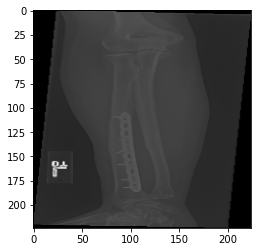

In [4]:
def show_image(n):
    plt.imshow(image_files[n])

show_image(886)
label[886]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_files, label, test_size = 0.2, random_state = 33)
X_train_arr, X_test_arr, y_train_arr, y_test_arr = train_test_split(image_arr, label_arr, test_size = 0.2, random_state = 33)

In [6]:
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import DenseNet201
from keras.applications.densenet import DenseNet121
from keras.models import Model
from keras import layers
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [7]:
# Import DenseNet169 pre-trained model
dense_model_169 = DenseNet169(include_top=True, weights='imagenet')

In [8]:
# Pop off the last layer
dense_model_169.layers.pop()

In [9]:
# Compile the model
predictions = Dense(1, activation='sigmoid')(dense_model_169.layers[-1].output)
model0 = Model(inputs=dense_model_169.input, outputs=predictions)

model0.compile(optimizer = Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Import DenseNet121 pre-trained model
dense_model_121 = DenseNet121(include_top=True, weights='imagenet')

In [11]:
# Pop off the last layer
dense_model_121.layers.pop()

In [12]:
# Compile the model
predictions = Dense(1, activation='sigmoid')(dense_model_121.layers[-1].output)
model1 = Model(inputs=dense_model_121.input, outputs=predictions)

model1.compile(optimizer = Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Import DenseNet201 pre-trained model
dense_model_201 = DenseNet201(include_top=True, weights='imagenet')

In [14]:
# Pop off the last layer
dense_model_201.layers.pop()

In [15]:
# Compile the model
predictions = Dense(1, activation='sigmoid')(dense_model_201.layers[-1].output)
model2 = Model(inputs=dense_model_201.input, outputs=predictions)

model2.compile(optimizer = Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# training all the models on the training dataset
history0 = model0.fit(X_train_arr, y_train_arr, epochs=20)
history1 = model1.fit(X_train_arr, y_train_arr, epochs=20)
history2 = model2.fit(X_train_arr, y_train_arr, epochs=20)

 
# predicting the output on the validation dataset
pred_0 = model0.predict(X_test_arr)
pred_1 = model1.predict(X_test_arr)
pred_2 = model2.predict(X_test_arr)
 
# final prediction after averaging on the prediction of all models
pred_final = (pred_0+pred_1+pred_2)/3.0

Epoch 1/20
46/46 [==============================] - 1210s 26s/step - loss: 0.6883 - accuracy: 0.6638
Epoch 2/20
46/46 [==============================] - 1308s 29s/step - loss: 0.6726 - accuracy: 0.8140
Epoch 3/20
46/46 [==============================] - 1203s 26s/step - loss: 0.6665 - accuracy: 0.8615
Epoch 4/20
46/46 [==============================] - 1243s 27s/step - loss: 0.6619 - accuracy: 0.8739
Epoch 5/20
46/46 [==============================] - 1278s 28s/step - loss: 0.6573 - accuracy: 0.8815
Epoch 6/20
46/46 [==============================] - 1252s 27s/step - loss: 0.6552 - accuracy: 0.8853
Epoch 7/20
46/46 [==============================] - 1259s 27s/step - loss: 0.6524 - accuracy: 0.8829
Epoch 8/20
46/46 [==============================] - 1082s 23s/step - loss: 0.6473 - accuracy: 0.8965
Epoch 9/20
46/46 [==============================] - 1156s 25s/step - loss: 0.6463 - accuracy: 0.8872
Epoch 10/20
46/46 [==============================] - 1117s 24s/step - loss: 0.6454 - accura

In [17]:
# Checking the loss, accuracy and kappa value of final model for the test set
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, confusion_matrix

# making the output integer value list for the predicted values for making confusion matrix
int_pred=[]
pred_final_all = [pred_0, pred_1, pred_2, pred_final]

total = len(pred_final)

for i in range(4):
    temp_pred=[]
    for j in range(total):
        if (pred_final_all[i][j]>=0.5): 
            temp_pred.append(1)
        else:
            temp_pred.append(0)
    int_pred.append(temp_pred)

# Using confusion matrix for finding the accuracy, precision, recall(sensitivity), specificity, F1_score and kappa value
TP=[]
FP=[]
FN=[]
TN=[]
for i in range(4):
    cm=confusion_matrix(y_test_arr,int_pred[i])
    TP.append(cm[0][0])
    FP.append(cm[0][1])
    FN.append(cm[1][0])
    TN.append(cm[1][1])

accuracy=[]
precision=[]
recall=[]
specificity=[]
F1_score=[]
for i in range(4):
    accuracy.append((TP[i]+TN[i])/total)
    precision.append(TP[i]/(TP[i]+FP[i]))
    recall.append(TP[1]/(TP[1]+FN[1]))
    specificity.append(TN[i]/(TN[i]+FP[i]))
    F1_score.append(2*precision[i]*recall[i]/(precision[i]+recall[i]))
    
p2=len(y_test_arr[y_test_arr==1])
p3=len(y_test_arr[y_test_arr==0])

Kappa=[]
for i in range(4):
    observed_acc=accuracy[i]
    p4=0
    for j in int_pred[i]:
        if j==0:
            p4+=1
    p1=total-p4
    expected_acc=((p1*p2/total)+(p3*p4/total))/total
    Kappa.append((observed_acc-expected_acc)/(1-expected_acc))
    
# Calculating log losses of all models
log_losses=[]
for i in range (4):
    log_losses.append(log_loss(y_test_arr, int_pred[i]))

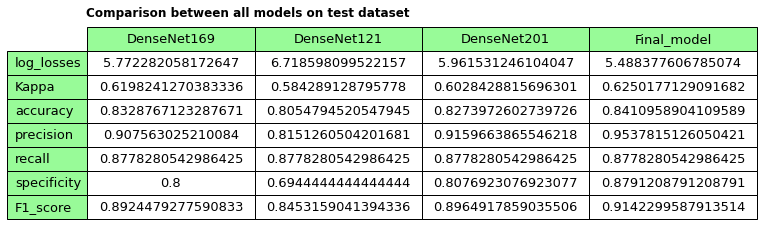

In [18]:
log_losses, Kappa, accuracy, precision, recall, specificity, F1_score
val1 = ["DenseNet169", "DenseNet121", "DenseNet201", "Final_model"]
val2 = ["log_losses", "Kappa", "accuracy", "precision", "recall", "specificity", "F1_score"] #7
val3 = [log_losses, Kappa, accuracy, precision, recall, specificity, F1_score] 
   
fig, ax = plt.subplots() 
ax.set_axis_off() 
table = ax.table( 
    cellText = val3,  
    rowLabels = val2,  
    colLabels = val1, 
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc ='center',  
    loc ='upper left')         

table.scale(2,2)
table.auto_set_font_size(False)
table.set_fontsize(13)
   
ax.set_title('Comparison between all models on test dataset', 
             fontweight ="bold") 
   
plt.show() 

model0


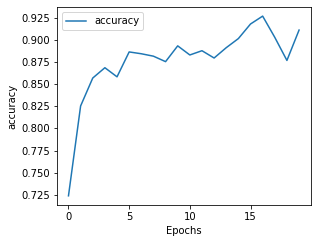

In [19]:
#visualizing the history object of model0
print("model0")
hist = history0.history

plt.figure(figsize=(10, 8))

for label in ['accuracy']:
    plt.subplot(221)
    plt.plot(hist[label], label = label)
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("accuracy")

model1


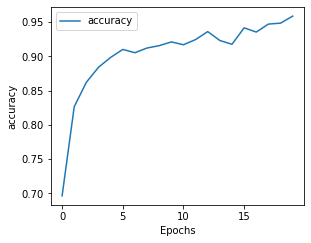

In [20]:
#visualizing the history object of model1
print("model1")
hist = history1.history

plt.figure(figsize=(10, 8))

for label in ['accuracy']:
    plt.subplot(221)
    plt.plot(hist[label], label = label)
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("accuracy")

model2


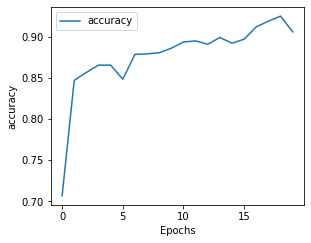

In [21]:
#visualizing the history object of model2
print("model2")
hist = history2.history

plt.figure(figsize=(10, 8))

for label in ['accuracy']:
    plt.subplot(221)
    plt.plot(hist[label], label = label)
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("accuracy")